In [2]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

# # %matplotlib inline
# plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [3]:
amazon_ratings = pd.read_csv('./ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,205616461,5,1369699200
1,A3JM6GV9MNOF9X,558925278,3,1355443200
2,A1Z513UWSAAO0F,558925278,5,1404691200
3,A1WMRR494NWEWV,733001998,4,1382572800
4,A3IAAVS479H7M7,737104473,1,1274227200


In [4]:
amazon_ratings.shape

(1048575, 4)

In [5]:
# import pickle
# filename = 'savemodel.sav'
# pickle.dump(most_popular,open(filename,'wb'))

In [8]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
json_object = most_popular.to_json() 
json_object

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0000YUXI0,2143
B000ZMBSPE,2041
B003BQ6QXK,1918


<AxesSubplot:xlabel='ProductId'>

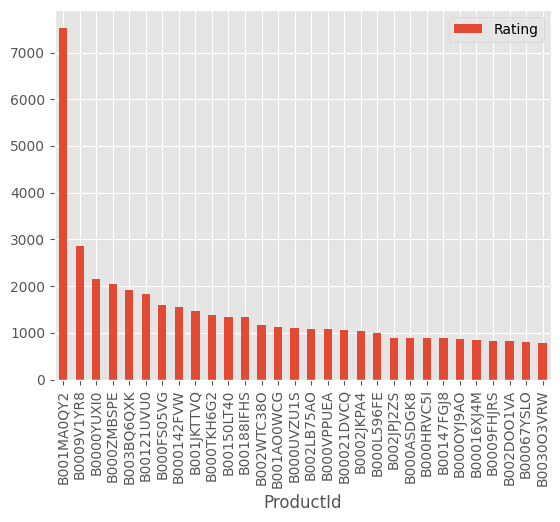

In [7]:
most_popular.head(30).plot(kind = "bar")

## Model-based collaborative filtering system

In [62]:
df = amazon_ratings.head(10000)


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,205616461,5,1369699200
1,A3JM6GV9MNOF9X,558925278,3,1355443200
2,A1Z513UWSAAO0F,558925278,5,1404691200
3,A1WMRR494NWEWV,733001998,4,1382572800
4,A3IAAVS479H7M7,737104473,1,1274227200
...,...,...,...,...
1048570,A31P1LMEXJ8MML,B003H897AQ,1,1334448000
1048571,A6U8SW1MFX122,B003H897AQ,4,1361404800
1048572,A2ND0PP8HY7KBE,B003H897AQ,1,1372464000
1048573,AC9W044EAHP8P,B003H897AQ,1,1392768000


In [9]:
df_process = df.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
df_process.head()

ProductId,1304139212,1304139220,130414089X,130414643X,1304146537,130414674X,1304168522,1304174778,1304174867,1304174905,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_process.shape

(9697, 886)

In [11]:
X = df_process.T 
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
1304139212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304139220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414089X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414643X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304146537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X.shape

(886, 9697)

In [13]:
X1 = X

## Decomposing the Matrix

In [14]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

## Correlation Matrix

In [60]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

array([[ 1.        ,  0.67763018,  0.3429332 , ...,  0.4170652 ,
        -0.76725101, -0.60625715],
       [ 0.67763018,  1.        ,  0.46736512, ...,  0.22725513,
        -0.2728339 , -0.71663005],
       [ 0.3429332 ,  0.46736512,  1.        , ...,  0.19989859,
        -0.10084438, -0.28359149],
       ...,
       [ 0.4170652 ,  0.22725513,  0.19989859, ...,  1.        ,
        -0.20352144, -0.07618431],
       [-0.76725101, -0.2728339 , -0.10084438, ..., -0.20352144,
         1.        ,  0.64494865],
       [-0.60625715, -0.71663005, -0.28359149, ..., -0.07618431,
         0.64494865,  1.        ]])

In [16]:
X.index[95]

'6053640972'

In [61]:
i = "6053640972"
product_names = list(X.index)
product_ID = product_names.index(i)
product_ID,product_names

(95,
 ['1304139212',
  '1304139220',
  '130414089X',
  '130414643X',
  '1304146537',
  '130414674X',
  '1304168522',
  '1304174778',
  '1304174867',
  '1304174905',
  '1304196046',
  '1304196062',
  '1304196070',
  '1304196135',
  '1304351475',
  '1304482596',
  '1304482634',
  '1304482685',
  '1304488608',
  '1304495396',
  '1304511073',
  '1304511081',
  '1304511111',
  '130451112X',
  '1304511138',
  '1304511146',
  '1304511154',
  '1304622193',
  '1304622223',
  '1304622428',
  '1304622452',
  '1304622460',
  '1304622622',
  '1304622657',
  '1304622665',
  '1304624498',
  '1304624544',
  '1304651029',
  '1304651088',
  '130465110X',
  '1304651118',
  '1304651347',
  '1304665704',
  '1304665720',
  '130466578X',
  '1403790965',
  '1412759676',
  '1451646526',
  '1457982633',
  '1572671203',
  '1879187396',
  '1906987238',
  '1929099886',
  '1987958179',
  '205616461',
  '3222000565',
  '322700075X',
  '3227001055',
  '3227001381',
  '3292000971',
  '3423470476',
  '360211600X',
  '4

In [18]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

### Recommending top 10 highly correlated products in sequence

In [20]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:100]

['130414089X',
 '1451646526',
 '3227001381',
 '3423470476',
 '4057362894',
 '4057363823',
 '4057368825',
 '5297000963',
 '535795531X',
 '5357955832',
 '5357956227',
 '558925278',
 '6022600685',
 '602260074X',
 '6022600804',
 '6041134473',
 '604113449X',
 '6041134511',
 '6162071103',
 '6162751473',
 '6169040335',
 '7806397051',
 '7883527428',
 '7885223639',
 '8279995404',
 '8934903716',
 '8997092219',
 '9029300388',
 '9602617918',
 '9740200133',
 '9745340936',
 '9747842297',
 '9749377397',
 '9749513444',
 '9788071139',
 '9788071171',
 '978807121X',
 '9788071465',
 '9788071554',
 '9788071597',
 '9788072348',
 '9788072372',
 '9788072828',
 '9788072895',
 '978807314X',
 '9788073263',
 '9788073409',
 '9788073492',
 '9788074049',
 '9788074286',
 '9788074367',
 '9788074553',
 '9788075363',
 '978807572X',
 '9788077625',
 '978807801X',
 '9788078389',
 '9788079970',
 '9788080227',
 '9788080928',
 '9788081053',
 '9790770154',
 '9790770308',
 '9790770871',
 '9790770898',
 '9790770995',
 '979077134